In [89]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

We would like to optimise the fundtion below 
$$
f = -\exp(-(x_1 x_2 - 1.5)^2-(x_2-1.5)^2),
$$
Using gradient descent algorithms. The starting point will be placed at $x_0 = [2.5 , 0.5]$. 


The funstion is plotted below;

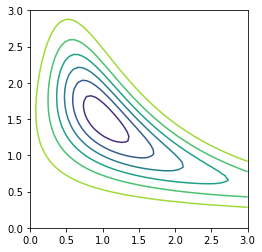

In [90]:
# plot the function
nx = 50
ny = 50
# Geometrie
x = np.linspace(0,3,nx+1);
y = np.linspace(0,3,ny+1);
X, Y = np.meshgrid(x, y,indexing = 'ij')


F = -np.exp(-(X*Y - 1.5)**2-(Y-1.5)**2)

# plot the function
plt.contour(X,Y,F)
plt.axis('image')
plt.show()

First define the function and the gradient symbolically 

In [91]:
x1, x2, alpha = sp.symbols('x1 x2 alpha', real=True)    # Creating the variables
f             = -sp.exp(-(x1*x2 - 1.5)**2-(x2-1.5)**2)  # Function to minimize
gradf         = sp.Matrix([f.diff(x1), f.diff(x2)])     # Function Gradient
Hessf         = sp.Matrix([[gradf[0].diff(x1), gradf[0].diff(x2)],
                          [gradf[1].diff(x1), gradf[1].diff(x2)]])  # Function Hess

## Gradient descent with line search
(the code from lecture 1 is given below)

### Change the line search to a Polak-Ribiere algorithm 

Initialise the problem

In [ ]:
x = sp.Matrix([2.5, 0.5])        # First initial guess
eps = 1e-3                       # Precision
stepDiffTab = np.array([])      
stepDiff = 1                     # Difference between 2 steps, init at 1 for the loop
stepCounter = 0 

Optimisation loop

In [93]:
searchSpace    = np.linspace(0.0, 1.0, num=100)           # Line-search range
alphaSpace     = np.zeros(len(searchSpace))               # Line-search results
trajectory_ls  = np.array([[2.5],[0.5]])                  # Trajectory of x


while ((stepDiff > eps) and (stepCounter < 100)):  
    
 
    # Calculating dk
    g = sp.Matrix(gradf.subs(x1, x[0]).subs(x2, x[1]))
    normg = np.linalg.norm(np.array([g[0], g[1]], dtype=float))
    d = -g/normg
    

    # Line search
    minProblem = f.subs(x1, x[0] + alpha*d[0]).subs(x2, x[1] + alpha*d[1])
    
    for i in range(len(searchSpace)) :
        alphaSpace[i] = minProblem.subs(alpha, searchSpace[i])
    minAlpha = searchSpace[np.argmin(alphaSpace)]
    
    # Actuating x
    normxOld = np.linalg.norm(np.array([x[0], x[1]], dtype=float))
    x        = x + minAlpha*d
    normxNew = np.linalg.norm(np.array([x[0], x[1]], dtype=float))
    stepDiff = abs(normxNew - normxOld)
    
    # Keeping x values for plotting
    trajectory_ls  = np.hstack((trajectory_ls, x))
    stepDiffTab = np.append(stepDiffTab,stepDiff)
    stepCounter += 1

minimum of f : x =  Matrix([[1.00876987617092], [1.49669761510589]])


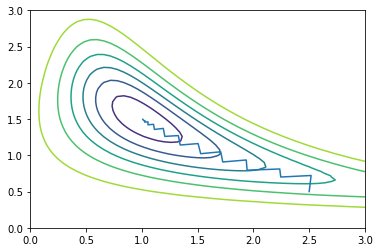

In [94]:
print('minimum of f : x = ', x)

plt.contour(X,Y,F)
plt.plot(trajectory_ls[0], trajectory_ls[1])

## Newton's method

initialise the problem

In [95]:
x =np.array([[2.5],[0.5]])        # First initial guess
eps = 1e-3                       # Precision
stepDiffTab = np.array([])      
stepDiff = 1                     # Difference between 2 steps, init at 1 for the loop
stepCounter = 0 

Optimisation loop

In [99]:
trajectory_N  = np.array([[2.5],[0.5]])    # Trajectory of x

while ((stepDiff > eps) and (stepCounter < 100)): 

    
    g       =                      #>>> define the gradient
    Hessinv =                      #>>> define the Hessian
    d       =                      #>>> find the direction
     
    
    
    # Actuating x
    normxOld = np.linalg.norm(np.array([x[0], x[1]], dtype=float))
    x        =                     #>>> update x with the new direction
    normxNew = np.linalg.norm(np.array([x[0], x[1]], dtype=float))
    stepDiff = abs(normxNew - normxOld)
    
    
    # Keeping x values for plotting 
    trajectory_N  = np.hstack((trajectory_N, x))
    stepDiffTab = np.append(stepDiffTab,stepDiff)
    print('x = ', x)
    stepCounter += 1

In [100]:
print('minimum of f : x = ', x)

plt.contour(X,Y,F)
plt.plot(trajectory_ls[0], trajectory_ls[1])
plt.plot(trajectory_N[0], trajectory_N[1])

### Compare the performence of Newtons method with L-BFGS (You can use Pythons library for the implementation of L-BFGS)